In [3]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import scipy.stats
from scipy.linalg import svd
from matplotlib import pyplot as plt

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that: OK
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* 1)Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix OK
* 2)Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result OK
* 3)What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained OK
* 4)Redefine the data according to the new basis from the PCA OK
* 5)Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots. OK

In [9]:
#generating datasets 
N = 1000
x_1 = np.random.normal(0, 1, N)
x_2 = x_1 + np.random.normal(0, 3, N)
x_3 = 2*x_1 + x_2
#matrix 3 (rows = datasets) and 1000 colums (= N).  It is a np array
matrix = np.array([x_1, x_2, x_3])  

#getting the covariance matrix 
cov = np.cov(matrix)

# 1) 
eval1, evec1 = la.eig(cov) #eval1l=eigenvalues   evec1=eigenvectors
idx = np.argsort(eval1)[::-1]
eval1 = eval1[idx]
evec1 = evec1[:, idx]
print("Eigenvalues:\n", np.real_if_close(eval1), '\n')
print("Eigenvectors (matrix of them):\n", evec1, '\n')

# 2)
# perform the SVD
U, S, Vt = la.svd(matrix)
# Rescale the SVD spectrum, i.e. S, to get the eigenvalues
svd_eval = S**2/(N-1)
# The matrix U already contains the eigenvectors
svd_evec = U

print('Eigenvalues with SVD method\n',svd_eval)
print('\nEigenvectors with SVD method\n', svd_evec)

print("Checking if the methods are equal")
print("Spectrum:\n", np.allclose(eval1, svd_eval, 1e-3))
print("Eigenvectors:\n", np.allclose(evec1, svd_evec, 1e-3))

""" The check for eigenvalues says that they are not equal but instead they are: the first two are exactely the same, the third are not but 
they have odg of 10^-15 and 10^-32, i.e. I can say that they are both approximately zero."""

""" From the check, we can say that the eigenvalues calculated using the two methods are the same, 
within a precision of 10^-3 which we can consider acceptable."""


Eigenvalues:
 [2.75873724e+01 1.98206397e+00 1.95960269e-16] 

Eigenvectors (matrix of them):
 [[-0.11486385  0.56580883 -0.81649658]
 [-0.57810761 -0.70648774 -0.40824829]
 [-0.80783531  0.42512992  0.40824829]] 

Eigenvalues with SVD method
 [2.76202986e+01 1.98502030e+00 9.53407900e-32]

Eigenvectors with SVD method
 [[-0.11508173  0.56576455 -0.81649658]
 [-0.5778355  -0.70671031 -0.40824829]
 [-0.80799896  0.42481879  0.40824829]]
Checking if the methods are equal
Spectrum:
 False
Eigenvectors:
 False


' From the check, we can say that the eigenvalues calculated using the two methods are the same, \nwithin a precision of 10^-3 which we can consider acceptable.'

In [5]:
# 3) 
L = np.diag(np.real_if_close(eval1))
print("Lambda:\n", L, '\n')
print("Trace(Lambda):\n", L.trace(), '\n')

print("By selecting the component 0, i.e setting to zero all but the first value of the diagonal, we retain",(L[0,0]/L.trace()), " of the total variability" )
print("By selecting the component 1, i.e setting to zero all but the first two value of the diagonal, we retain",(L[1,1]/L.trace()), " of the total variability" )
print("By selecting the component 2, i.e. considering all the elements of the diagonal, we retain",(L[2,2]/L.trace()), " of the total variability" )

''' 

My dataset is made by three component but only one is independent, i.e. x1, the other two depend on it. Knowing this, it makes sense that the 
first component (i.e. component 0) takes the 0.94 of the variability, meanwhile the other two components take respectively 0.06 and 3.3e-17.

'''

#Reducing my dataset till I can retain 99% of the total variability
trace = (np.diag(eval1)).trace()
print('\n The trace is:',trace)

#summing eigenvalues till reaching the 99% of the trace
threshold = 0.99*trace
sum_eval = 0  

enum = enumerate(np.flip(np.sort(eval1)))
print('\n',list(enum))

for i, j in enumerate(np.flip(np.sort(eval1))):
    sum_eval += j
    print(i)
    if sum_eval >= threshold:
        i += 1
        break


Lambda:
 [[2.74418026e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.15191884e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.15436709e-15]] 

Trace(Lambda):
 29.593721455501907 

By selecting the component 0, i.e setting to zero all but the first value of the diagonal, we retain 0.9272846154004287  of the total variability
By selecting the component 1, i.e setting to zero all but the first two value of the diagonal, we retain 0.07271538459957119  of the total variability
By selecting the component 2, i.e. considering all the elements of the diagonal, we retain 3.900716207414698e-17  of the total variability

 The trace is: (29.593721455501907+0j)

 [(0, (27.441802618132503+0j)), (1, (2.151918837369403+0j)), (2, (1.1543670891919236e-15+0j))]
0
1


Eigenvalue: (27.441802618132503+0j) ,	eigenvector: [-0.11511771 -0.57779056 -0.80802598]
Eigenvalue: (2.151918837369403+0j) ,	eigenvector: [ 0.56575723 -0.70674706  0.42476741]
Eigenvalue: (1.1543670891919236e-15+0j) ,	eigenvector: [-0.81649658 -0.40824829  0.40824829]


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-15.0, 15.0)

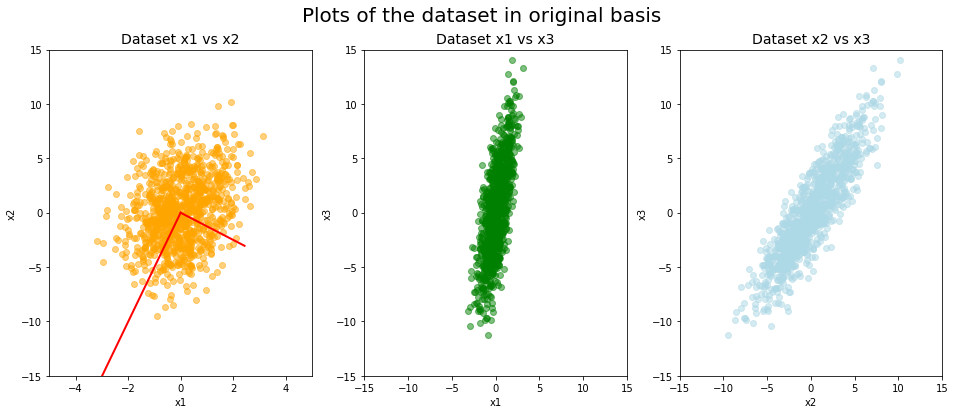

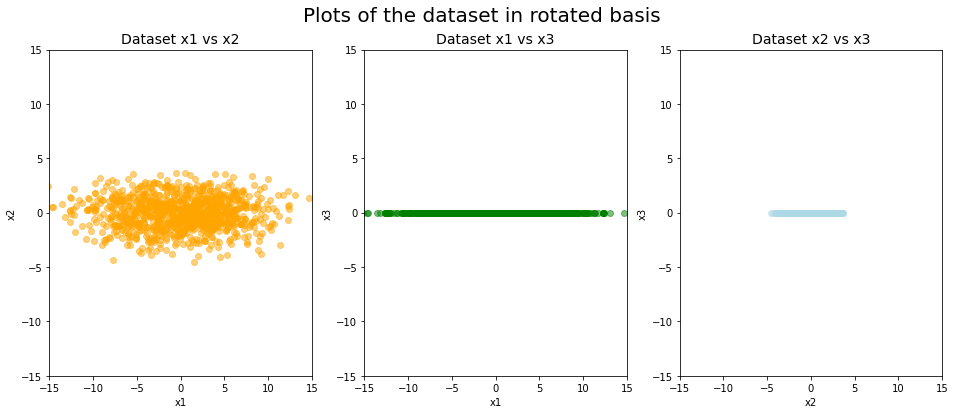

In [6]:
# 4)
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
cov_nb = np.dot(evec1.T, matrix)

#5) plotting the rotated dataset and its "axes"
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,6))
fig.suptitle('Plots of the dataset in original basis', size = 20)

ax[0].scatter( x= x_1, y = x_2, color ='orange', alpha = 0.5)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Dataset x1 vs x2', fontsize = 14)
ax[0].set_xlim(-5,5)
ax[0].set_ylim(-15,15)

ax[1].scatter( x= x_1, y = x_3, color ='green',alpha = 0.5)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[1].set_title('Dataset x1 vs x3', fontsize = 14)
ax[1].set_xlim(-15,15)
ax[1].set_ylim(-15,15)

ax[2].scatter( x= x_2, y = x_3, color ='lightblue',alpha = 0.5)
ax[2].set_xlabel('x2')
ax[2].set_ylabel('x3')
ax[2].set_title('Dataset x2 vs x3', fontsize = 14)
ax[2].set_xlim(-15,15)
ax[2].set_ylim(-15,15)



# plotting also for the first plot eigenvectors rescaled by the eigenvalues to give a general idea of them 
scale_factor = 2
for li, vi in zip(eval1, evec1.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    ax[0].plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)


fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,6))
fig.suptitle('Plots of the dataset in rotated basis', size = 20)

ax[0].scatter( cov_nb[0,:], cov_nb[1,:],color ='orange',alpha = 0.5)
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Dataset x1 vs x2', fontsize = 14)
ax[0].set_xlim(-15,15)
ax[0].set_ylim(-15,15)

ax[1].scatter( cov_nb[0,:], cov_nb[2,:], color ='green',alpha = 0.5)
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x3')
ax[1].set_title('Dataset x1 vs x3', fontsize = 14)
ax[1].set_xlim(-15,15)
ax[1].set_ylim(-15,15)

ax[2].scatter( cov_nb[1,:], cov_nb[2,:], color ='lightblue',alpha = 0.5)
ax[2].set_xlabel('x2')
ax[2].set_ylabel('x3')
ax[2].set_title('Dataset x2 vs x3', fontsize = 14)
ax[2].set_xlim(-15,15)
ax[2].set_ylim(-15,15)

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [7]:
#adding uncorrelated random noise
s, m = np.random.uniform(1/50, 5/50, 10), np.random.uniform(-5, 5, 10)

noise = np.array([np.random.normal(mean,sigma,N) for mean, sigma in zip(m, s)])
new_matrix = np.vstack((matrix, noise))

#getting the covariance matrix 
new_cov = np.cov(new_matrix)

new_eval, new_evec = la.eig(new_cov) #eval1l=eigenvalues   evec1=eigenvectors
idx = np.argsort(eval1)[::-1]
new_eval = new_eval[idx]
new_evec = new_evec[:, idx]
#print("Eigenvalues:\n", np.real_if_close(new_eval), '\n')
#print("Eigenvectors (matrix of them):\n", new_evec, '\n')

new_L = np.diag(np.real_if_close(new_eval))

print("By selecting the component 0, i.e setting to zero all but the first value of the diagonal, we retain",(new_L[0,0]/new_L.trace()), " of the total variability" )
print("\n We can notice that we can retain 0.923 of the new dataset to which I've added some uncorrelated noise, so we obtain aproximately the same value of the previous section. This tells us that the noise does not change significantly our dataset. ")


By selecting the component 0, i.e setting to zero all but the first value of the diagonal, we retain 0.9269555355632606  of the total variability

 We can notice that we can retain 0.923 of the new dataset to which I've added some uncorrelated noise, so we obtain aproximately the same value of the previous section. This tells us that the noise does not change significantly our dataset. 


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [8]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P /
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P /

#opening data file and changing it into pd dataframe
data =  pd.read_csv("magic04.data", sep=",")
col = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
data.columns = col

#checking what is inside the file
with open("magic04.names") as f:
    print(f.read())

# filter data to get only signal, class h is background
data = data[data['class'] == 'g']
# drop class column 
data = data.drop(['class'], axis=1)

#changing .data file in numpy array
data_set = data.to_numpy()
data_set = data_set.reshape((data_set.shape[1], data_set.shape[0]))



Mcov = np.cov(data_set[:,:12000])
l, V = la.eig(Mcov)

Lambda = np.diag(np.real_if_close(l))
l = np.real_if_close(l)

pca = l/np.trace(Lambda)
print(pca)
var = 0
for k in range(1, len(pca)+1):
    var = pca[:k].sum()
    if var > 0.95:
        print('PCA succeded with k =', k, ' with variability of', var*100)
        break
    elif k == len(pca)-1:
        print('PCA failed, max variability reached is ', var*100, '% with', k, 'components out of', len(pca))
        break


1. Title of Database: MAGIC gamma telescope data 2004

2. Sources:

   (a) Original owner of the database:

       R. K. Bock
       Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
       http://wwwmagic.mppmu.mpg.de
       rkb@mail.cern.ch

   (b) Donor:

       P. Savicky
       Institute of Computer Science, AS of CR
       Czech Republic
       savicky@cs.cas.cz

   (c) Date received: May 2007

3. Past Usage:

   (a) Bock, R.K., Chilingarian, A., Gaug, M., Hakl, F., Hengstebeck, T.,
       Jirina, M., Klaschka, J., Kotrc, E., Savicky, P., Towers, S.,
       Vaicilius, A., Wittek W. (2004).
       Methods for multidimensional event classification: a case study
       using images from a Cherenkov gamma-ray telescope.
       Nucl.Instr.Meth. A, 516, pp. 511-528.

   (b) P. Savicky, E. Kotrc.
       Experimental Study of Leaf Confidences for Random Forest.
       Proceedings of COMPSTAT 2004, In: Computational Statistics.
       (Ed.: Antoch J.) - Heidelberg, Physi